Project: Salary Prediction

Author: Shray Mishra


In [1]:
# Importing Libraries for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
# Load the data 

trainf_df = pd.read_csv('train_features.csv')
traint_df = pd.read_csv('train_salaries.csv')
testf_df = pd.read_csv('test_features.csv')

## Overview of training and testing data

In [4]:
trainf_df.head(20)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [5]:
trainf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [6]:
traint_df.head(20)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [8]:
traint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [7]:
testf_df.head(20)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [9]:
testf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


Type of variables in the dataset

In [13]:
trainf_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

### Check for Null Values

In [47]:
trainf_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [48]:
testf_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

### Check if there are duplicates in the data

In [10]:
traint_df.duplicated().sum()

0

In [11]:
trainf_df.duplicated().sum()

0

In [12]:
testf_df.duplicated().sum()

0

### Examining numerical and categorical variables

In [15]:
trainf_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [16]:
trainf_df.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685049041,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### Merging features and targets in a single dataframe

In [17]:
train_df = pd.merge(trainf_df, traint_df, on = 'jobId')

In [20]:
# Examining the combined new dataframe 

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [21]:
train_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


### Visualizing the independent variable

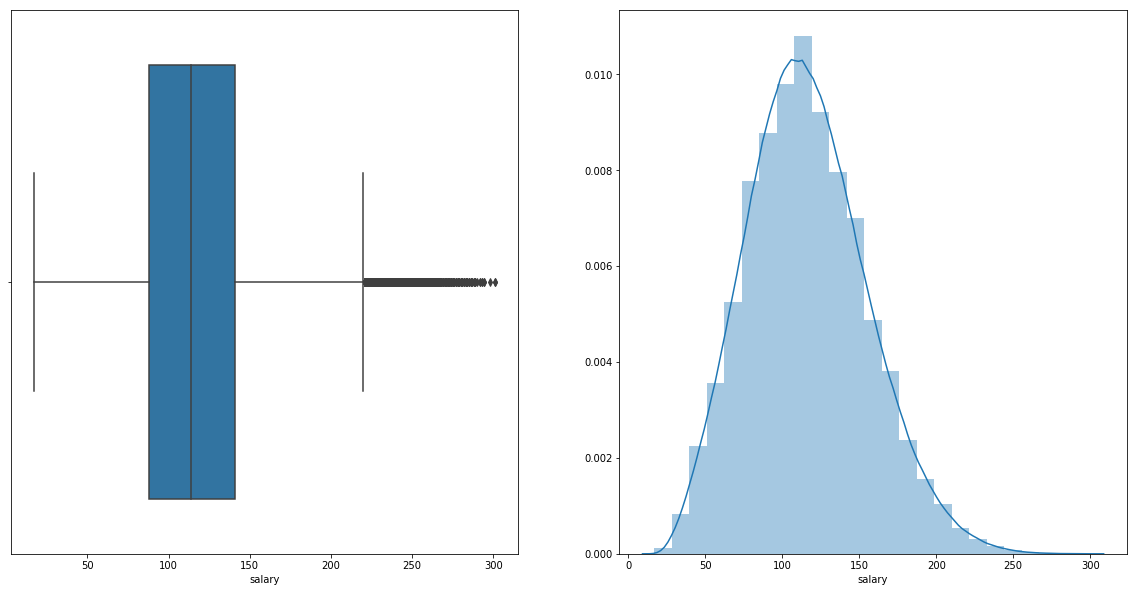

In [62]:
plt.figure(figsize = (20,10))
plt.subplot(121)
sns.boxplot(train_df.salary)
plt.subplot(122)
sns.distplot(train_df.salary, bins = 25)
plt.show()

In [26]:
# Identifying the outliers

train_stats = train_df.salary.describe()
print (train_stats)

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64


In [28]:
# Calculating bound to find outliers
quartile = train_stats['75%'] - train_stats['25%']
upper_bound = train_stats['75%'] + 1.5 * quartile
lower_bound = train_stats['25%'] - 1.5 * quartile

In [29]:
print('Upper bound and Lower bound for outliers are {} and {} '.format(upper_bound, lower_bound))

Upper bound and Lower bound for outliers are 220.5 and 8.5 


In [30]:
# Outliers below lower bound

"""The low paying salary outliers are positions with 0 salaries and it seems like an outlier"""

train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [31]:
# Outliers above upper bound

"""The high paying salary outliers belong to C-level executives in the dataset and shouldn't be removed"""

train_df[train_df.salary > 222.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
966,JOB1362684408653,COMP32,CEO,DOCTORAL,ENGINEERING,FINANCE,23,11,247
986,JOB1362684408673,COMP37,CFO,HIGH_SCHOOL,NONE,FINANCE,24,20,229
1211,JOB1362684408898,COMP24,CTO,DOCTORAL,BUSINESS,FINANCE,5,46,232
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
1413,JOB1362684409100,COMP56,VICE_PRESIDENT,MASTERS,MATH,WEB,24,15,241


In [32]:
# Removing rows with 0 salaries

train_df = train_df[train_df.salary > 8.5]

### Creating function to visualise the relationship between independent and dependent variables

In [89]:
def feature_visual(df, column):
    
    """
    Plot for each feature in the dataset
    """
    
    plt.figure (figsize = (20,8))
    plt.subplot(121)
    
    if df[column].dtype == 'int64':
        df[column].value_counts().sort_index().plot()
        
    else:
        
        mean = df.groupby(column)['salary'].mean()
        df[column] = df[column].astype('category')
        levels = mean.sort_values().index.tolist()
        
        df[column].cat.reorder_categories(levels, inplace = True)
        df[column].value_counts().plot()
        
    plt.xticks(rotation = 45)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.subplot(122)
    
    
    if df[column].dtype == 'int64' or column == 'companyId':
        
        mean = df.groupby(column)['salary'].mean()
        std = df.groupby(column)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values - std.values, mean.values + std.values, alpha = 0.1)
        
    else:

        sns.boxplot (x = column, y = 'salary', data = df)

    plt.xticks (rotation = 60)
    plt.ylabel ('Salary')
    plt.show()

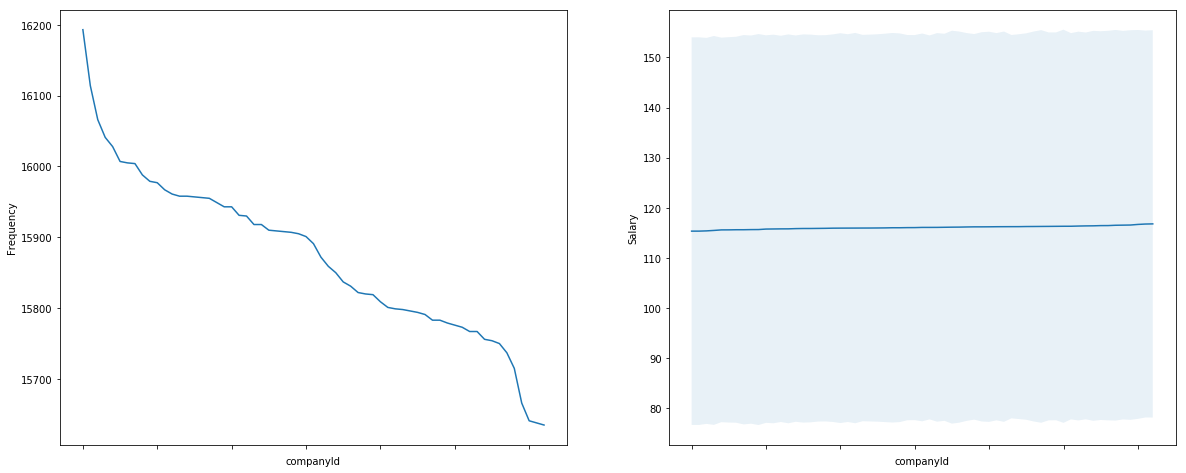

In [90]:
feature_visual(train_df, 'companyId')

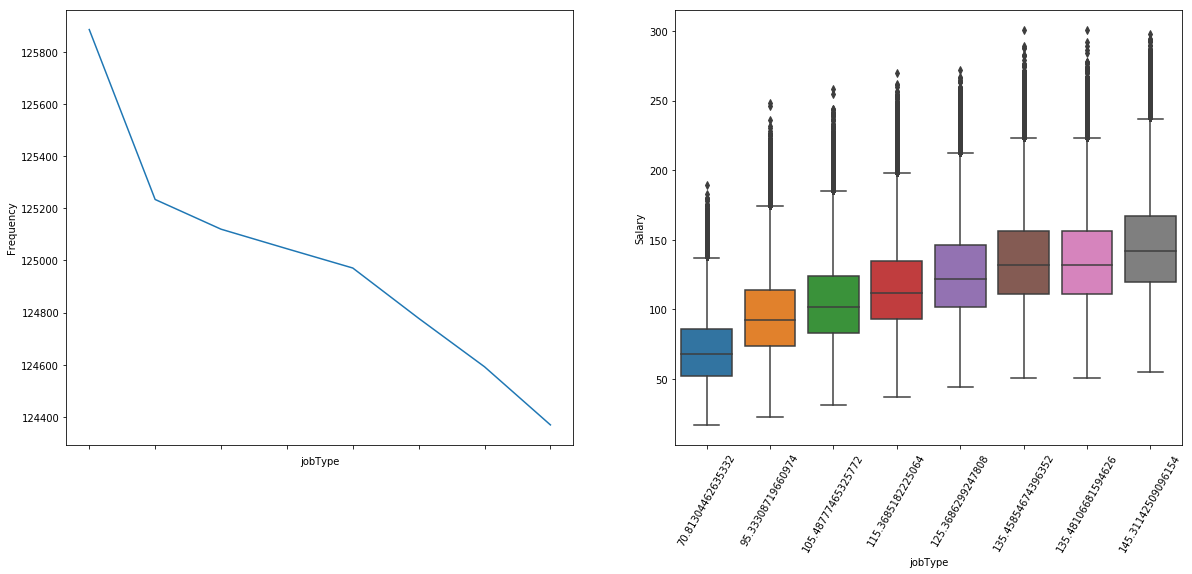

In [91]:
feature_visual(train_df, 'jobType')

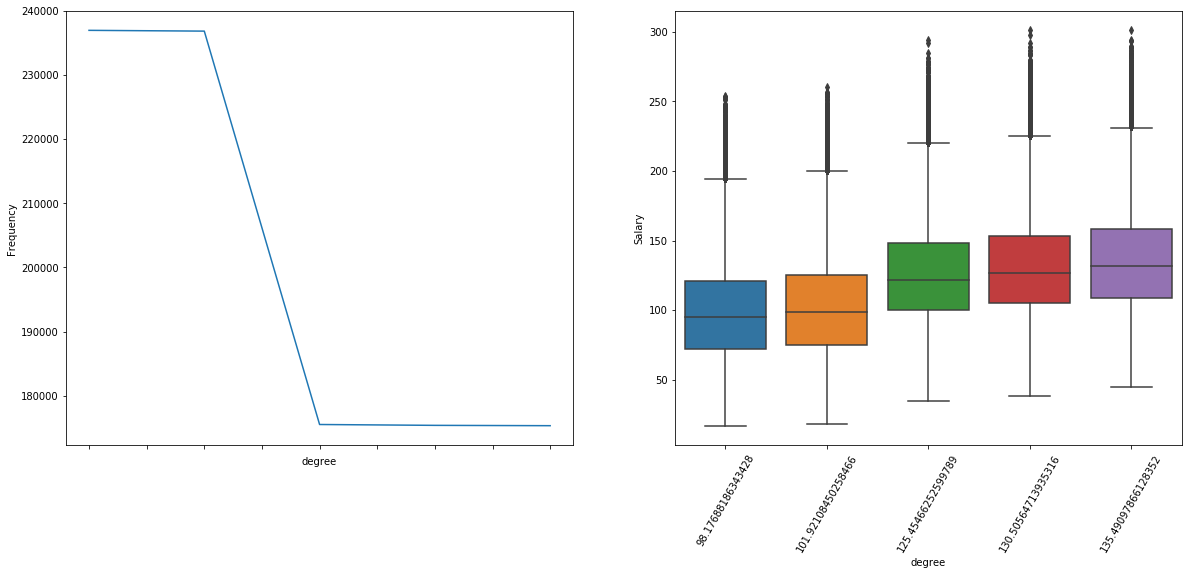

In [92]:
feature_visual(train_df, 'degree')

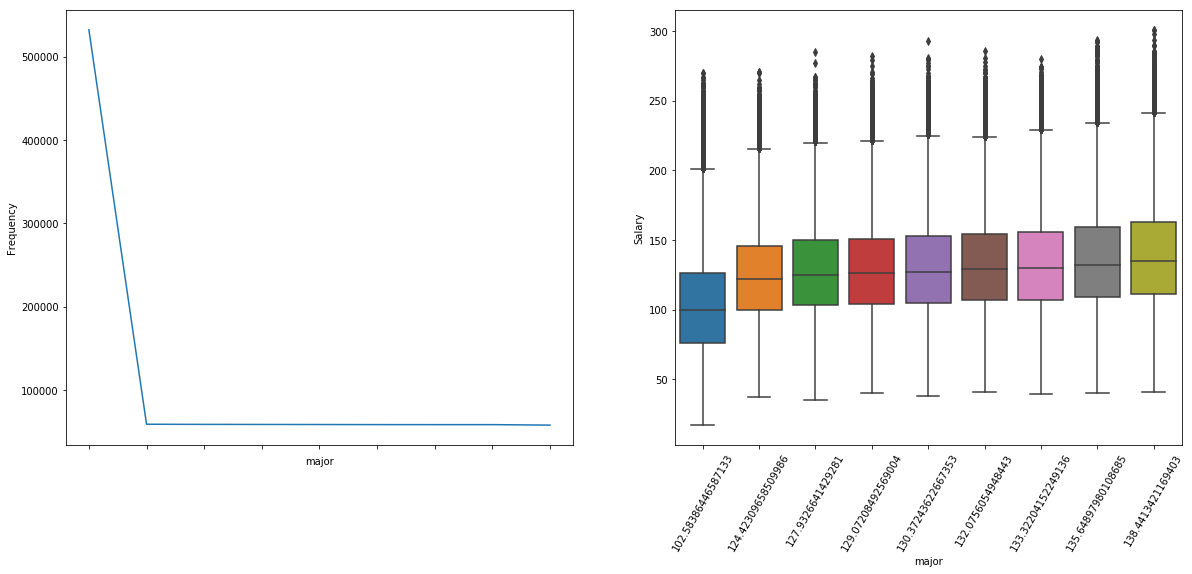

In [93]:
feature_visual(train_df, 'major')

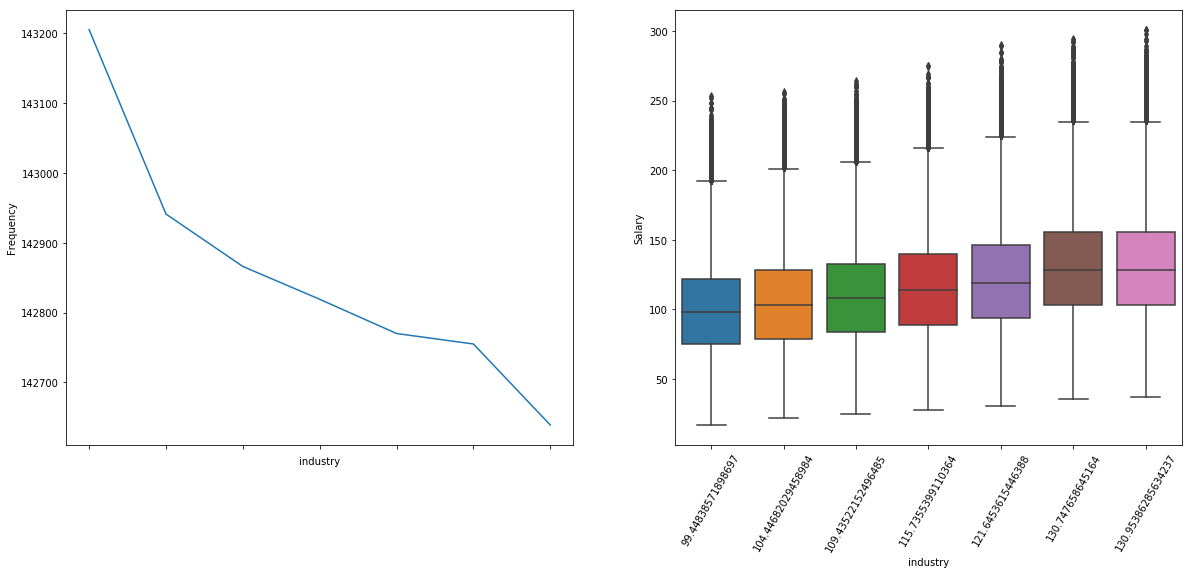

In [94]:
feature_visual(train_df, 'industry')

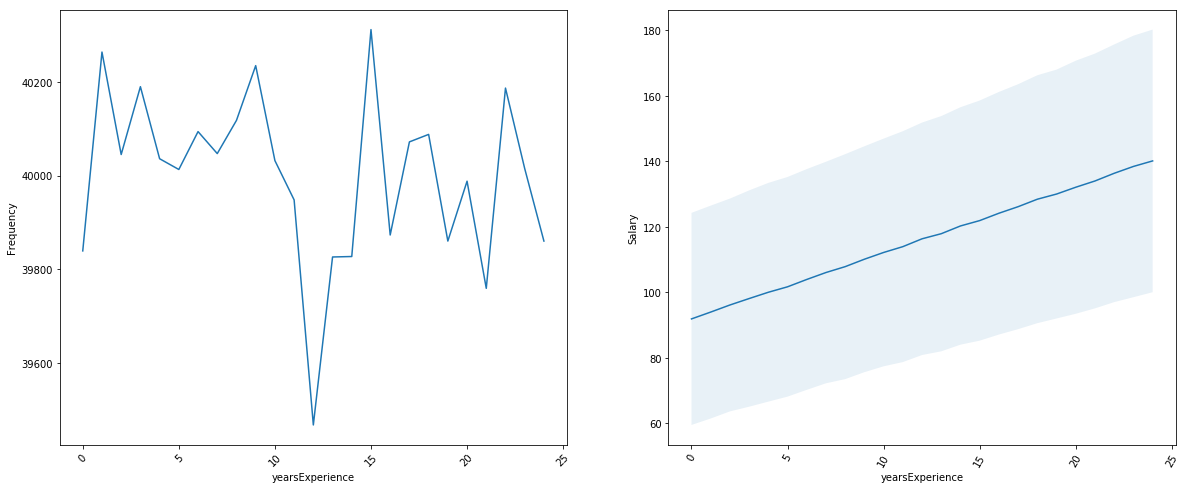

In [95]:
feature_visual(train_df, 'yearsExperience')

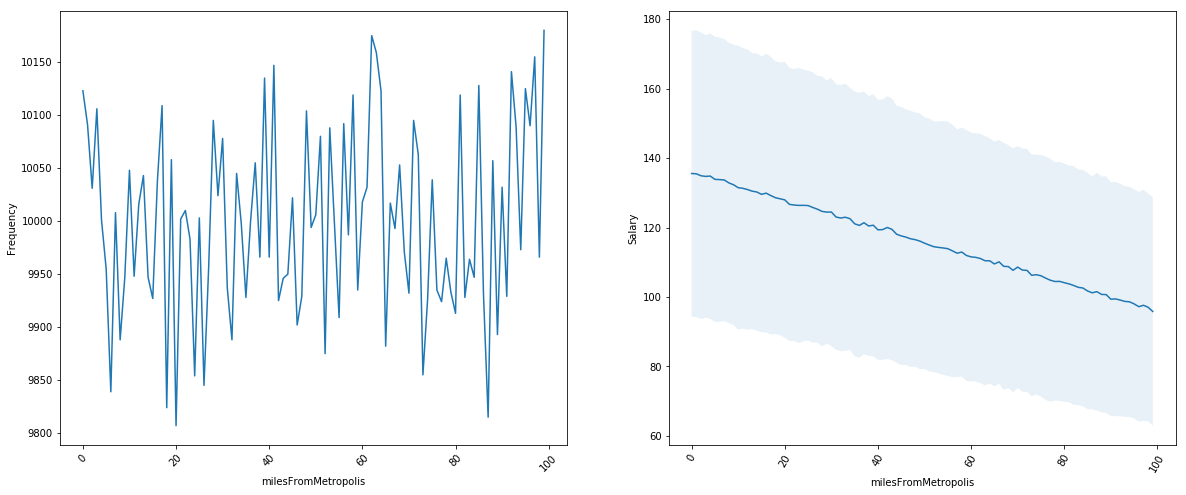

In [96]:
feature_visual(train_df, 'milesFromMetropolis')

In [97]:
def label_replacement(df, column):
    """
    Replacing the labels in categories with mean of salary for each categories
    """
    cat_dict = {}
    
    cats = df[column].cat.categories.tolist()
    
    for cat in cats:
        
        cat_dict[cat] = train_df[train_df[column] == cat]['salary'].mean()
        
    df[column] = df[column].map(cat_dict)

In [98]:
for column in train_df.columns:
    if train_df[column].dtypes.name == "category":
        label_replacement(train_df, column)

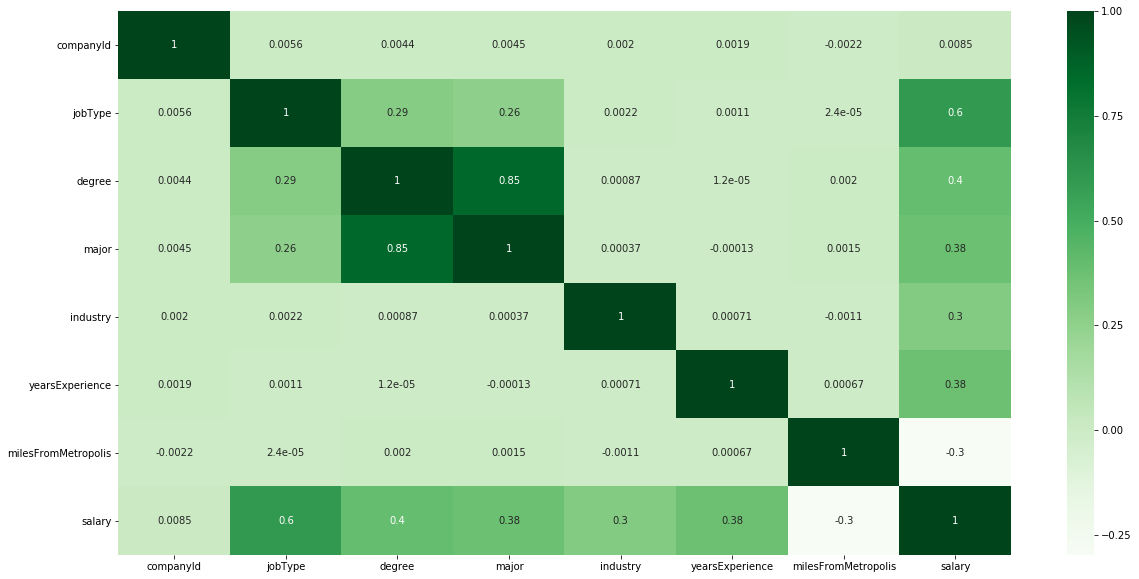

In [88]:
# Correlation between dependent and independent variables

fig = plt.figure(figsize = (20,10))
values = ['companyId', 'jobType', 'degree', 'major', 'industry','yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[values + ['salary']].corr(), cmap = 'Greens', linecolor ='black', annot = True)
plt.xticks(rotation = 0)
plt.show()